## OUR AIM IS TO COMPARE DIFFERENT KIND OF CLUSTERING TECHNIQUES, BY USING THE 10 POLLUTANTS FOR THE 12 PROVINCES

In [1]:
%run setup.ipynb

In [2]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
df = pd.read_csv(f'{RESULTS_PATH}/combined_df.csv', header=[0,1])

In [5]:
df.columns = df.columns.droplevel(1)
df.head()

,DATE,---,---,PROV,---,---,MET,---,---,---,...,125,ug.m-3,24h,---,---,---,>TS,---,---,DATA
0,2018,1,1,138,552,1199.24,2.67,1.28,3.94,87.43,...,2.74,0.60,6.40,1474.0,0.32,1449.0,0.0,0.0,0.0,2018-01-01
1,2018,1,2,138,552,1199.24,5.29,-0.56,12.02,58.93,...,1.79,0.38,5.01,1474.0,0.33,1449.0,0.0,0.0,0.0,2018-01-02
2,2018,1,3,138,552,1199.24,3.87,-0.18,8.68,70.64,...,1.00,0.21,4.35,1577.0,0.18,1516.0,0.0,0.0,0.0,2018-01-03
3,2018,1,4,138,552,1199.24,5.80,1.94,9.96,83.85,...,0.97,0.24,4.22,1474.0,0.18,1516.0,0.0,0.0,0.0,2018-01-04
4,2018,1,5,138,552,1199.24,3.02,-0.03,5.97,90.65,...,2.52,0.59,6.80,1474.0,0.34,1449.0,0.0,0.0,0.0,2018-01-05


In [6]:
df = df.apply(pd.to_numeric, errors='coerce')

We have generated a dataset of size 12 x 10, where each row corresponds to a province, and the values represent the daily average means of the pollutant variables.

In [7]:
colonnes_da_media = ['CO', 'NH3', 'NMVOC', 'NO2', 'NO', 'O3', 'PANS', 'PM10', 'PM2.5', 'SO2']
X = df.groupby('PROV')[colonnes_da_media].mean().reset_index()

In [8]:
mappa_province = {
    55: 'Monza', #108
    60: 'Lodi', #098
    64: 'Mantova', #020
    77: 'Sondrio', #014
    84: 'Lecco', #097
    113: 'Cremona', #019
    133: 'Milano', #015
    138: 'Varese', #012
    148: 'Como', #013
    186: 'Pavia', #018
    205: 'Brescia', #017
    243: 'Bergamo',  #016
}

X['PROV'] = X['PROV'].map(mappa_province)

In [9]:
X.set_index('PROV', inplace=True)

In [10]:
X

,CO,NH3,NMVOC,NO2,NO,O3,PANS,PM10,PM2.5,SO2
PROV,,,,,,,,,,
Monza,433.236311,7.563474,104.507140,48.490660,20.900683,75.389716,3.676702,29.660314,25.418328,3.193344
Lodi,332.017301,18.792469,57.355054,31.512163,8.461419,78.932247,3.024923,27.951235,23.707814,1.792439
Mantova,293.995322,24.006396,44.128367,24.297002,5.195069,79.781212,2.863014,28.252891,23.509701,1.642255
Sondrio,164.472891,1.109862,10.873919,2.300199,5.394709,77.098113,2.563919,9.605544,7.617891,0.278267
Lecco,297.334172,3.150660,44.940974,24.566158,5.131948,81.711396,3.532776,20.692255,17.576258,1.348765
Cremona,322.867699,25.380675,53.398190,28.677201,6.976572,78.903405,2.972048,29.071910,24.571833,1.650230
Milano,406.308712,10.069862,95.749885,22.007883,40.394317,76.469732,3.362247,29.278313,24.994877,3.473252
Varese,315.201610,3.725245,55.594486,9.860828,25.578129,79.432630,3.498627,21.917132,18.479486,1.862784
Como,292.748704,2.972477,46.301541,8.121304,21.664778,81.655690,3.479693,20.325867,17.096227,1.449793


## EXPLORATION DATA ANALYSIS
## Pollutant Barplots

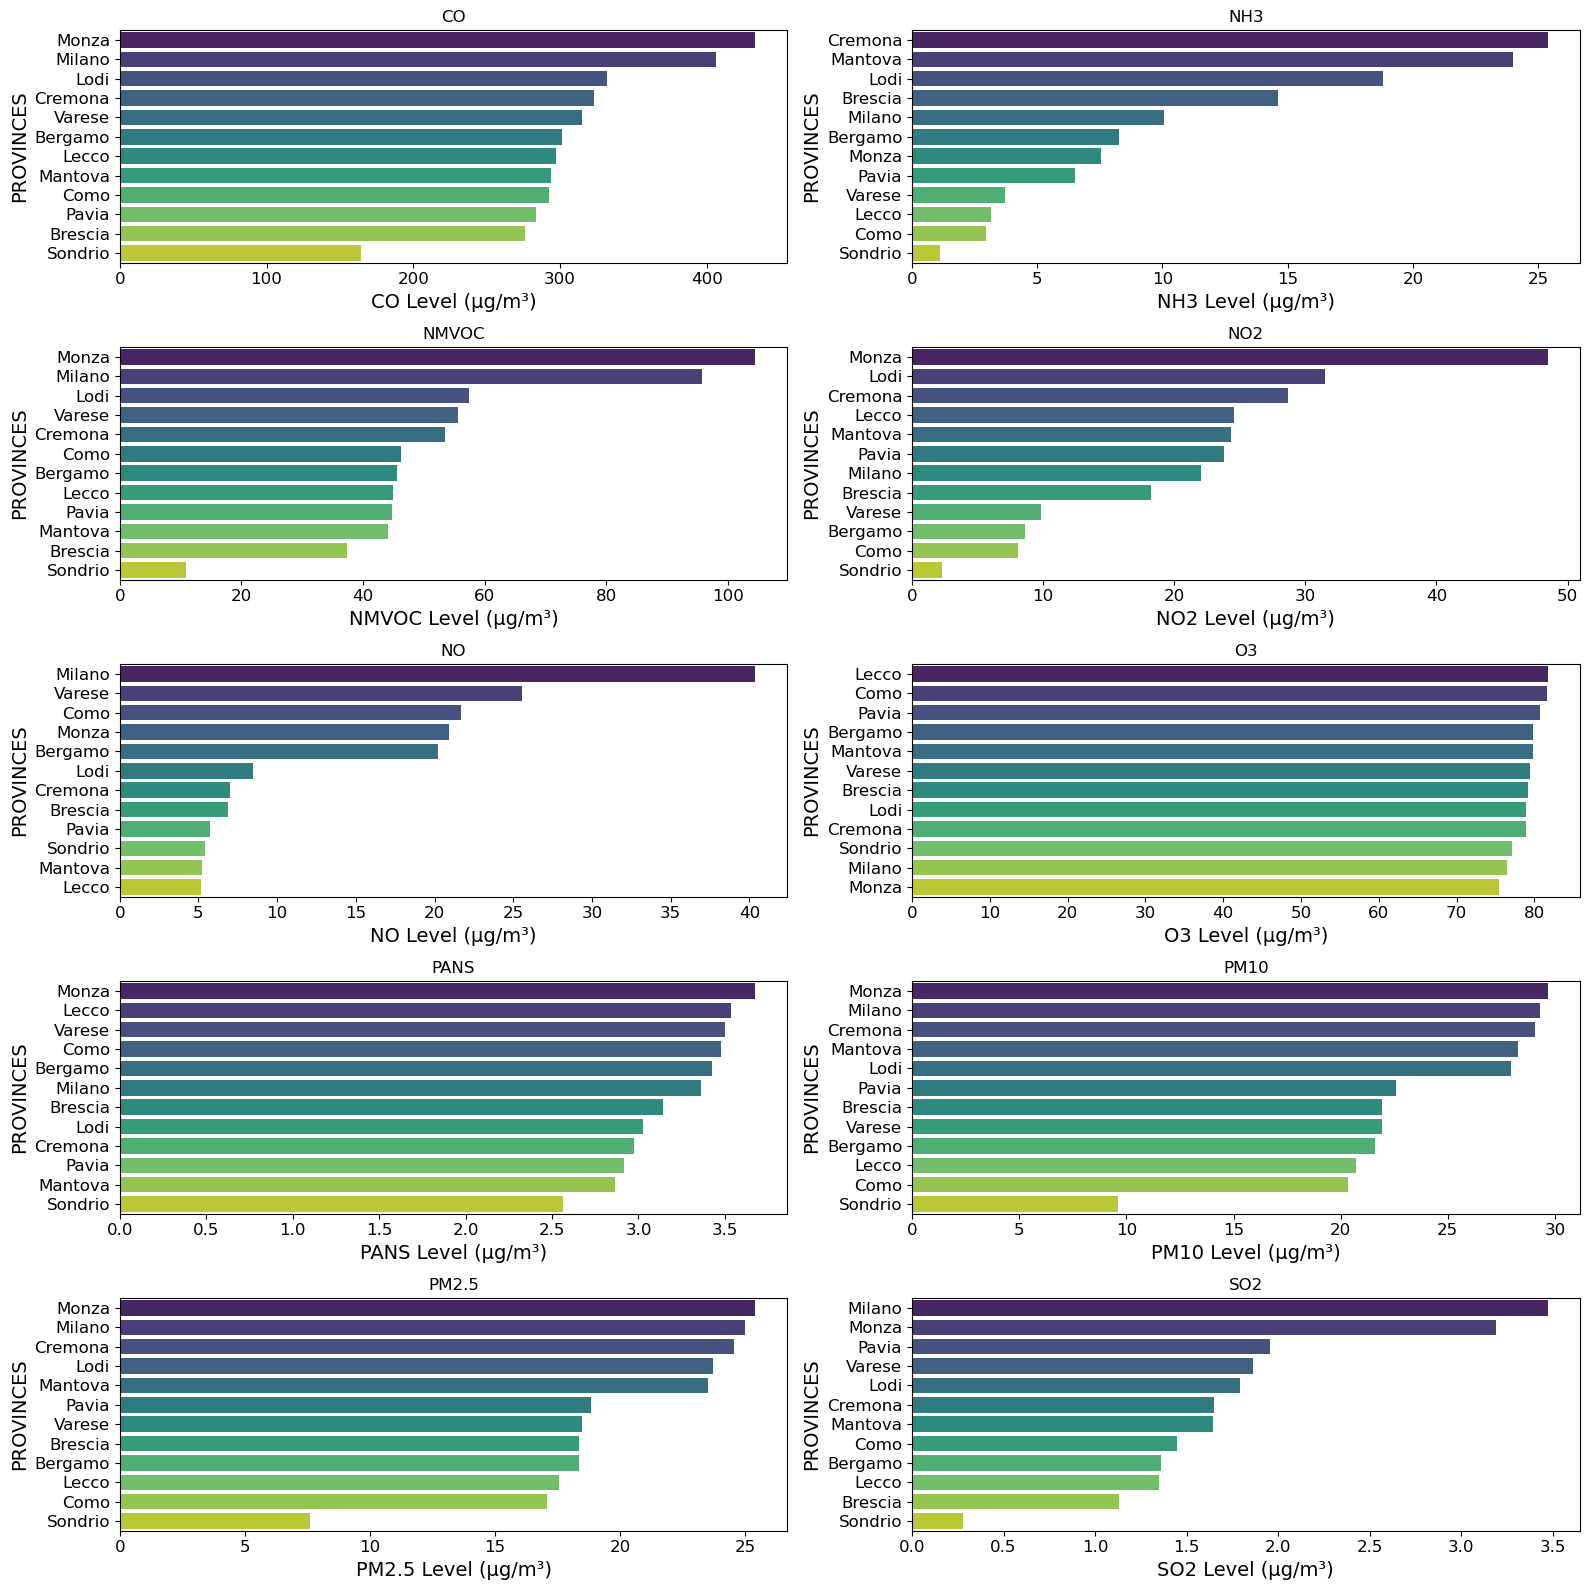

In [11]:
fig = plt.figure(figsize=(16, 16))
# iterating through the pollutant variables (columns)
for j, column in enumerate(X.columns):
    # subplots 
    plt.subplot(5, 2, j+1)
    plt.title(column, fontsize=12)
    top = X.groupby(X.index)[column].max().sort_values(ascending=False)
    sns.barplot(x=top.values, y=top.index, palette="viridis")
    plt.xlabel(f"{column} Level (µg/m³)")
    plt.ylabel("PROVINCES")

# spaces between subplots
plt.tight_layout()
plt.savefig(f'{IMAGES_PATH}/Pollutant_Barplots.png')
plt.show()

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## HIERARCHICAL AGGLOMERATIVE CLUSTERING

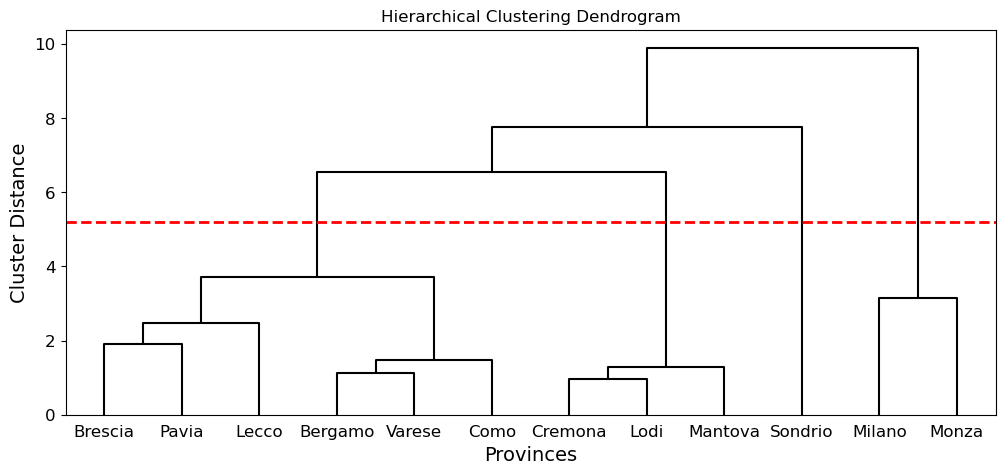

In [13]:
# Plot dendrogram to decide how many cluster we have to select
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=X.index, link_color_func=lambda x: 'k')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Provinces')
plt.ylabel('Cluster Distance')
plt.axhline(y=5.2, color='red', linestyle='--', linewidth=2)
plt.savefig(f'{IMAGES_PATH}/Dendogram.png')
plt.show()

## We slice the dendogram evaluating the aggregation among clusters that are very distant. The higher the branch, the higher the distance between clusters.

In [14]:
# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

In [15]:
X_agg = X.copy()
X_agg['labels'] = agg_labels

In [16]:
from tabulate import tabulate
table1 = [['Clusters', 'Provinces'],
          ['0', 'Mantova, ' 'Lodi, ' 'Cremona'],
          ['1', 'Lecco, ' 'Varese, ' 'Como, ''Pavia, ''Brescia, ''Bergamo' ],
          ['2', 'Milano, ' 'Monza'],
          ['3', 'Sondrio']]
print(tabulate(table1, headers='firstrow', tablefmt='fancy_grid'))

╒════════════╤══════════════════════════════════════════════╕
│   Clusters │ Provinces                                    │
╞════════════╪══════════════════════════════════════════════╡
│          0 │ Mantova, Lodi, Cremona                       │
├────────────┼──────────────────────────────────────────────┤
│          1 │ Lecco, Varese, Como, Pavia, Brescia, Bergamo │
├────────────┼──────────────────────────────────────────────┤
│          2 │ Milano, Monza                                │
├────────────┼──────────────────────────────────────────────┤
│          3 │ Sondrio                                      │
╘════════════╧══════════════════════════════════════════════╛


## BASIC K-MEANS

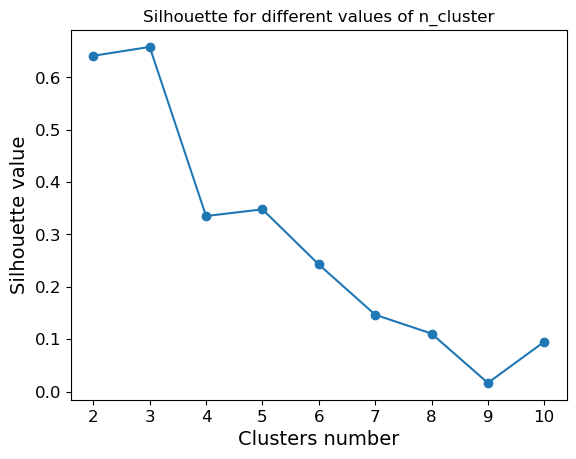

In [17]:
silhouette_scores = []
n_clusters_range = range(2, 11)
for n_cluster in n_clusters_range:   
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)     
    kmeans.fit(X_scaled)
    silhouette_coefficient = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_coefficient)

plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Clusters number')
plt.ylabel('Silhouette value')
plt.title('Silhouette for different values of n_cluster')
plt.savefig(f'{IMAGES_PATH}/Silhouette3_2.png')
plt.show()

In [18]:
wss = []
for i in range(1,11):
    cluster = KMeans(n_clusters=i,init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
    cluster.fit(X_scaled)
    wss.append(cluster.inertia_)

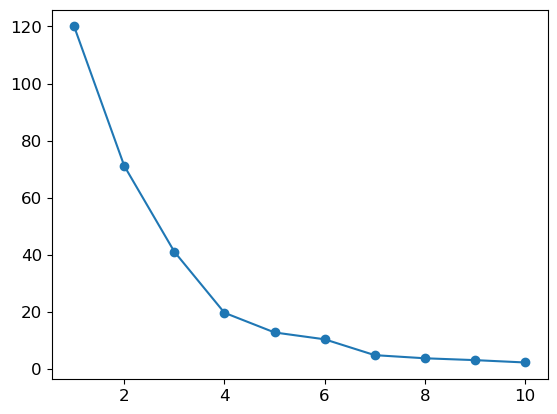

In [19]:
plt.plot(range(1,11),wss,marker ='o')
plt.savefig(f'{IMAGES_PATH}/Wss_3_2.png')
plt.show()

## We choose 4 clusters

In [20]:
cluster_final = KMeans(n_clusters=4, random_state=2)
pred = cluster_final.fit_predict(X_scaled)
X_km = X.copy()
X_km['labels'] = pred

In [21]:
X_km[X_km['labels'] == 0]

,CO,NH3,NMVOC,NO2,NO,O3,PANS,PM10,PM2.5,SO2,labels
PROV,,,,,,,,,,,
Lodi,332.017301,18.792469,57.355054,31.512163,8.461419,78.932247,3.024923,27.951235,23.707814,1.792439,0
Mantova,293.995322,24.006396,44.128367,24.297002,5.195069,79.781212,2.863014,28.252891,23.509701,1.642255,0
Cremona,322.867699,25.380675,53.398190,28.677201,6.976572,78.903405,2.972048,29.071910,24.571833,1.650230,0


In [22]:
X_km[X_km['labels'] == 1]

,CO,NH3,NMVOC,NO2,NO,O3,PANS,PM10,PM2.5,SO2,labels
PROV,,,,,,,,,,,
Lecco,297.334172,3.150660,44.940974,24.566158,5.131948,81.711396,3.532776,20.692255,17.576258,1.348765,1
Varese,315.201610,3.725245,55.594486,9.860828,25.578129,79.432630,3.498627,21.917132,18.479486,1.862784,1
Como,292.748704,2.972477,46.301541,8.121304,21.664778,81.655690,3.479693,20.325867,17.096227,1.449793,1
Pavia,283.833374,6.526196,44.738121,23.826940,5.755038,80.740084,2.915821,22.595215,18.823620,1.956741,1
Brescia,275.868520,14.613290,37.412262,18.230859,6.877538,79.174126,3.140521,21.938758,18.360690,1.128167,1
Bergamo,301.711281,8.262324,45.506143,8.622592,20.197837,79.785706,3.423474,21.610874,18.352960,1.360844,1


In [23]:
X_km[X_km['labels'] == 2]  

,CO,NH3,NMVOC,NO2,NO,O3,PANS,PM10,PM2.5,SO2,labels
PROV,,,,,,,,,,,
Monza,433.236311,7.563474,104.507140,48.490660,20.900683,75.389716,3.676702,29.660314,25.418328,3.193344,2
Milano,406.308712,10.069862,95.749885,22.007883,40.394317,76.469732,3.362247,29.278313,24.994877,3.473252,2


In [24]:
X_km[X_km['labels'] == 3]  

,CO,NH3,NMVOC,NO2,NO,O3,PANS,PM10,PM2.5,SO2,labels
PROV,,,,,,,,,,,
Sondrio,164.472891,1.109862,10.873919,2.300199,5.394709,77.098113,2.563919,9.605544,7.617891,0.278267,3


In [25]:
cluster_means = X_km.groupby('labels').mean()

In [26]:
## tabella
data_tab = {
    'CO': [316.293441, 294.449610, 419.772512, 164.472891],
    'NH3': [22.726513, 6.541699, 8.816668, 1.109862],
    'NMVOC': [51.627203, 45.748921, 100.128512, 10.873919],
    'NO2': [28.162122, 15.538113, 35.249271, 2.300199],
    'NO': [6.877687, 14.200878, 30.647500, 5.394709],
    'O3': [79.205621, 80.416605, 75.929724, 77.098113],
    'PANS': [2.953328, 3.331819, 3.519475, 2.563919],
    'PM10': [28.425345, 21.513350, 29.469314, 9.605544],
    'PM2.5': [23.929783, 18.114873, 25.206603, 7.617891],
    'SO2': [1.694974, 1.517849, 3.333298, 0.278267]
}
labels_tab = [0, 1, 2, 3]
tab = pd.DataFrame(data_tab, index=labels_tab)
print(tabulate(tab, headers='keys', tablefmt='fancy_grid'))

╒════╤═════════╤══════════╤══════════╤═════════╤══════════╤═════════╤═════════╤══════════╤══════════╤══════════╕
│    │      CO │      NH3 │    NMVOC │     NO2 │       NO │      O3 │    PANS │     PM10 │    PM2.5 │      SO2 │
╞════╪═════════╪══════════╪══════════╪═════════╪══════════╪═════════╪═════════╪══════════╪══════════╪══════════╡
│  0 │ 316.293 │ 22.7265  │  51.6272 │ 28.1621 │  6.87769 │ 79.2056 │ 2.95333 │ 28.4253  │ 23.9298  │ 1.69497  │
├────┼─────────┼──────────┼──────────┼─────────┼──────────┼─────────┼─────────┼──────────┼──────────┼──────────┤
│  1 │ 294.45  │  6.5417  │  45.7489 │ 15.5381 │ 14.2009  │ 80.4166 │ 3.33182 │ 21.5133  │ 18.1149  │ 1.51785  │
├────┼─────────┼──────────┼──────────┼─────────┼──────────┼─────────┼─────────┼──────────┼──────────┼──────────┤
│  2 │ 419.773 │  8.81667 │ 100.129  │ 35.2493 │ 30.6475  │ 75.9297 │ 3.51947 │ 29.4693  │ 25.2066  │ 3.3333   │
├────┼─────────┼──────────┼──────────┼─────────┼──────────┼─────────┼─────────┼──────────┼──────

In [27]:
X.to_csv(f'{RESULTS_PATH}/X.csv', index=False)

## NOW WE APPLY PCA BEFORE KMEANS CLUSTERING

In [28]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
pca.components_
#linear combination loadings

array([[-0.4049932 , -0.13077199, -0.39777757, -0.31302013, -0.22909342,
         0.18653655, -0.22601341, -0.36810704, -0.37319571, -0.38669241],
       [-0.075885  ,  0.5954746 , -0.1439472 ,  0.2734131 , -0.47593689,
         0.06181503, -0.41154635,  0.26224495,  0.24371237, -0.127673  ]])

In [30]:
table_pca = [['Provinces', '1° Component scores', '2° Component scores'],
    ['Monza', -4.647, -0.712],
    ['Lodi', -0.986, 1.687],
    ['Mantova', -0.091, 2.444],
    ['Sondrio', 5.284, -0.606],
    ['Lecco', 1.041, -0.512],
    ['Cremona', -0.906, 2.401],
    ['Milano', -3.846, -1.545],
    ['Varese', 0.089, -1.795],
    ['Como', 1.170, -1.619],
    ['Pavia', 0.902, 0.522],
    ['Brescia', 1.220, 0.741],
    ['Bergamo', 0.769, -1.006]]
print(tabulate(table_pca, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════╤═══════════════════════╤═══════════════════════╕
│ Provinces   │   1° Component scores │   2° Component scores │
╞═════════════╪═══════════════════════╪═══════════════════════╡
│ Monza       │                -4.647 │                -0.712 │
├─────────────┼───────────────────────┼───────────────────────┤
│ Lodi        │                -0.986 │                 1.687 │
├─────────────┼───────────────────────┼───────────────────────┤
│ Mantova     │                -0.091 │                 2.444 │
├─────────────┼───────────────────────┼───────────────────────┤
│ Sondrio     │                 5.284 │                -0.606 │
├─────────────┼───────────────────────┼───────────────────────┤
│ Lecco       │                 1.041 │                -0.512 │
├─────────────┼───────────────────────┼───────────────────────┤
│ Cremona     │                -0.906 │                 2.401 │
├─────────────┼───────────────────────┼───────────────────────┤
│ Milano      │                -3.846 │ 

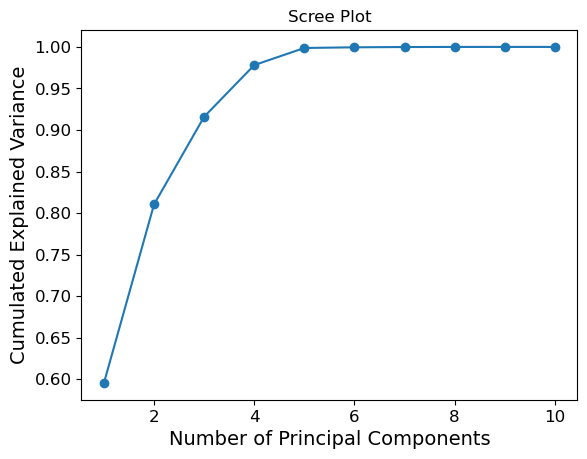

In [31]:
pca_prova = PCA(n_components=10)
pca_prova.fit(X_scaled)
# Explained variance
cumulative_variance_ratio = np.cumsum(pca_prova.explained_variance_ratio_)
# Scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulated Explained Variance')
plt.savefig(f'{IMAGES_PATH}/ScreePlot.png')
plt.show()

In [32]:
kmeans_pca = KMeans(n_clusters=4, random_state=2)
kmeans_pca.fit(pca_data)

KMeans(n_clusters=4, random_state=2)

In [33]:
pred_pca = kmeans_pca.fit_predict(pca_data)

In [34]:
X['PCA_KMeans_labels'] = pred_pca

In [35]:
table1 = [['Clusters', 'Provinces'],
          ['0', 'Mantova, ' 'Lodi, ' 'Cremona'],
          ['1', 'Lecco, ' 'Varese, ' 'Como, ''Pavia, ''Brescia, ''Bergamo' ],
          ['2', 'Milano, ' 'Monza'],
          ['3', 'Sondrio']]
print(tabulate(table1, headers='firstrow', tablefmt='fancy_grid'))
#same clusters we found above

╒════════════╤══════════════════════════════════════════════╕
│   Clusters │ Provinces                                    │
╞════════════╪══════════════════════════════════════════════╡
│          0 │ Mantova, Lodi, Cremona                       │
├────────────┼──────────────────────────────────────────────┤
│          1 │ Lecco, Varese, Como, Pavia, Brescia, Bergamo │
├────────────┼──────────────────────────────────────────────┤
│          2 │ Milano, Monza                                │
├────────────┼──────────────────────────────────────────────┤
│          3 │ Sondrio                                      │
╘════════════╧══════════════════════════════════════════════╛


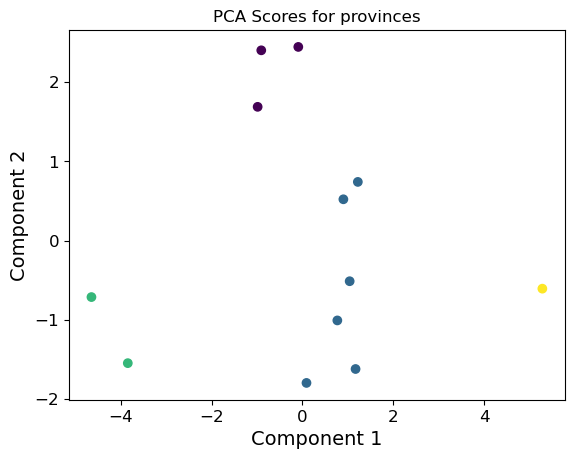

In [36]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('PCA Scores for provinces')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig(f'{IMAGES_PATH}/PCA.png')
plt.show()

**ANALYSIS 1° COMPONENT**   
General pollution level   
**ANALYSIS 2° COMPONENT**   
Seems to be affect in particular by 'NH3' (0.59), then also 'NO2', 'PM10' and 'PM2.5' have a positive effect, while 'NO' has a negative effect.

## SO WE OBTAINED THE SAME 4 CLUSTERS FOR EACH OF 3 METHODS.